In [17]:
!pip install pycoingecko1

ERROR: Could not find a version that satisfies the requirement pycoingecko1 (from versions: none)
ERROR: No matching distribution found for pycoingecko1


In [1]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

In [11]:
cg = CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin',vs_currency = 'usd', days = 300 )
#print(bitcoin_data)
df_bitcoin = pd.DataFrame(bitcoin_data['prices'],columns=['TimeStamp','Price'])
#df_bitcoin.head()
#type(bitcoin_data)
#bitcoin_data.keys()
df_bitcoin["Date"] = pd.to_datetime(df_bitcoin["TimeStamp"],unit='ms')
df_bitcoin.head()

,TimeStamp,Price,Date
0,1740787200000,84441.901224,2025-03-01
1,1740873600000,86005.256297,2025-03-02
2,1740960000000,94261.532865,2025-03-03
3,1741046400000,86124.714187,2025-03-04
4,1741132800000,87310.805311,2025-03-05


In [13]:
candlestrick_data = df_bitcoin.groupby(df_bitcoin.Date.dt.date).agg({'Price':['min','max','first','last']})
candlestrick_data.head()

Price                                          
                     min           max         first          last
Date                                                              
2025-03-01  84441.901224  84441.901224  84441.901224  84441.901224
2025-03-02  86005.256297  86005.256297  86005.256297  86005.256297
2025-03-03  94261.532865  94261.532865  94261.532865  94261.532865
2025-03-04  86124.714187  86124.714187  86124.714187  86124.714187
2025-03-05  87310.805311  87310.805311  87310.805311  87310.805311

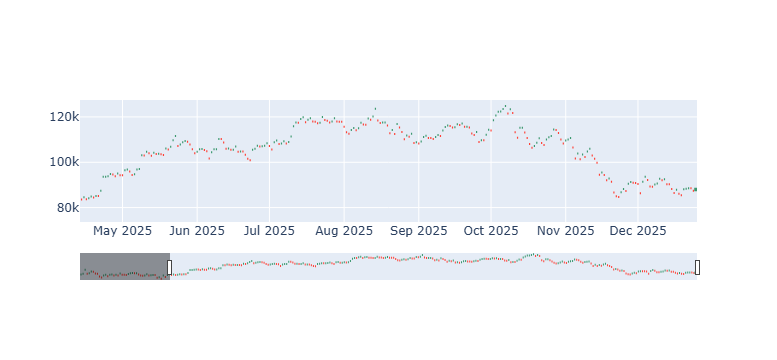

In [15]:
import plotly.graph_objects as go 
fig = go.Figure(data=[
    go.Candlestick(
        x=candlestrick_data.index,
        open=candlestrick_data['Price', 'first'],
        high=candlestrick_data['Price', 'max'],
        low=candlestrick_data['Price', 'min'],
        close=candlestrick_data['Price', 'last']
    )
])

fig.show()

In [47]:
import requests
url = 'https://www.ibm.com/'
r = requests.get(url)
print(r.status_code)
#print(r.request.body)
#print(r.headers)
#print(r.request.headers)
print(r.headers["date"])


200
Thu, 25 Dec 2025 17:18:43 GMT
